In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

import calmap
import folium
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [76]:
# Get Data From CSV File
data=pd.read_csv("D:/Projects/Covid19/DataSet/covid_19_data.csv",parse_dates=['Last Update'])
# Rename Columns
data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
# Display Data
data.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [77]:
data2= pd.read_csv('D:\Projects\Covid19\DataSet\covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
data2.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [78]:
data.shape

(11341, 8)

In [79]:
# Check for Data Types
data.dtypes

SNo                        int64
Date                      object
Province/State            object
Country                   object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [80]:
# Check for Null Values
data.isnull().sum().to_frame('nulls')

,nulls
SNo,0
Date,0
Province/State,3595
Country,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


In [81]:
map_data= data2[data2['Date'] == max(data2['Date'])].reset_index()
# World Map from folium Mao
world_map = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

# Add data to World Map
for i in range(0, len(map_data)):
    folium.Circle(
        location=[map_data.iloc[i]['Lat'], map_data.iloc[i]['Long']],
        color='red', 
        tooltip =   '<li><bold>Country : '+str(map_data.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(map_data.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(map_data.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(map_data.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(map_data.iloc[i]['Recovered']),
        radius=(map_data.iloc[i]['Confirmed'])**1.1).add_to(world_map)
#     Display Map
world_map

In [82]:
# Extract Data from the data set
processedData = data2.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
processedData = processedData.reset_index()
# Add date as the changing variable
processedData['Date'] = pd.to_datetime(processedData['Date'])
processedData['Date'] = processedData['Date'].dt.strftime('%m/%d/%Y')
processedData['size'] = processedData['Confirmed'].pow(0.3)

# Add data to the figure
figure = px.scatter_geo(processedData,locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(processedData['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Covid-19 Spread With Time')
# Display Figure
figure.update(layout_coloraxis_showscale=False)
figure.show()

C:\Users\User\Anaconda3\envs\yasas_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [83]:
dataFrame = data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
# Get All the Confiremd Cases all arounfd the world
Confirmed_patients=dataFrame.sort_values('Confirmed',ascending=False)
Confirmed_patients=Confirmed_patients.drop_duplicates('Country')

world_Total_Confirmed=Confirmed_patients['Confirmed'].sum()  #Total Confirmed Patients
world_Total_Deaths=Confirmed_patients['Deaths'].sum()        #Total Deaths
world_Total_Recovered=Confirmed_patients['Recovered'].sum()  #Total Recovered Patients
 
world_Deaths_Rate=(world_Total_Deaths*100)/world_Total_Confirmed           #Get Death Precentage of the World
world_Recovered_rate=(world_Total_Recovered*100)/world_Total_Confirmed    #Get Recovered Precentage in the World

China=Confirmed_patients[Confirmed_patients['Country']=='Mainland China']        #Get Confirmed Patients precentage in china
China_Recovered_rate=(int(China['Recovered'].values)*100)/int(China['Confirmed'].values)  #Get Recovered Patients precentage in china

Italy=Confirmed_patients[Confirmed_patients['Country']=='Italy']        #Get confirmed Patients Precentage in Italy
Italy_Recovered_rate=(int(Italy['Recovered'].values)*100)/int(Italy['Confirmed'].values)  #GEt Recovered Patients Precentage in Italy 

SriLanka=Confirmed_patients[Confirmed_patients['Country']=='Sri Lanka']        #Get Confirmed Patients Percentage in sri lanka
SriLanka_Recovered_rate=(int(SriLanka['Recovered'].values)*100)/int(SriLanka['Confirmed'].values)  #Get Recovered patients Precentage in Sri Lanka

#Add Values to the Table and Display Table
Table={'Total Confirmed Patients in the World : ':world_Total_Confirmed,'Total Deaths Confirmed in the world : ':world_Total_Deaths,'Total Recovered Patients in the world : ':world_Total_Recovered,'Rate of Recovered Patients(Precentage) :':world_Recovered_rate,'Rate of Death Patients(Precentage) :':world_Deaths_Rate,
      'Rate of Recovered China cases(Presentage) :':China_Recovered_rate,'Rate of Recovers Italy Cases(Precentage) : ':Italy_Recovered_rate,'Rate of Recovers in Sri Lankan Cases(Precentage) : ':SriLanka_Recovered_rate}
Table=pd.DataFrame.from_dict(Table,orient='index',columns=['Total'])

Table.style.background_gradient(cmap='Reds')

,Total
Total Confirmed Patients in the World :,378566.000000
Total Deaths Confirmed in the world :,16496.000000
Total Recovered Patients in the world :,100721.000000
Rate of Recovered Patients(Precentage) :,26.605929
Rate of Death Patients(Precentage) :,4.357496
Rate of Recovered China cases(Presentage) :,89.635830
Rate of Recovers Italy Cases(Precentage) :,11.625761
Rate of Recovers in Sri Lankan Cases(Precentage) :,2.061856


Text(0.5, 1.0, 'Covid 19 Data Analysis')

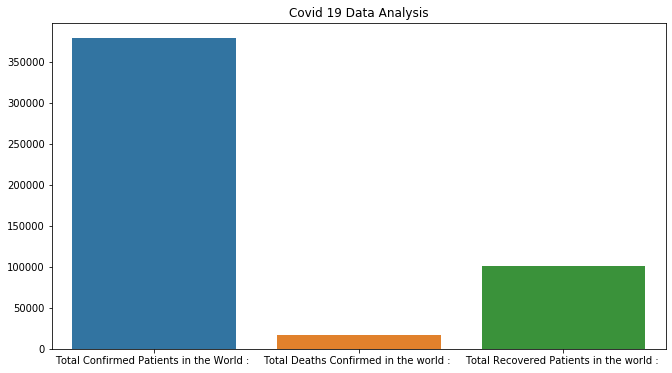

In [84]:
# Display Total Confirmed Patients/Deaths and Recovered
Graph=Table.head(3)
x=Graph.index
y=Graph['Total'].values
plt.rcParams['figure.figsize'] = (11,6)
sns.barplot(x,y,order=x ).set_title('Covid 19 Data Analysis') 

In [85]:
Recovered_rate=(Confirmed_patients['Recovered']*100)/Confirmed_patients['Confirmed']  #Get Recovered Precentage
Deaths_rate=(Confirmed_patients['Deaths']*100)/Confirmed_patients['Confirmed']  #Get Death Precentage
cases_rate=(Confirmed_patients.Confirmed*100)/world_Total_Confirmed    #Get Total Patients Confirmed

#Set Rated to the Table
Confirmed_patients['Recovered Patients Rate']=pd.DataFrame(Recovered_rate)  
Confirmed_patients['Deaths Patients Rate']=pd.DataFrame(Deaths_rate)
Confirmed_patients['Total Patients Rate']=pd.DataFrame(cases_rate)

# Display Table
Confirmed_patients.head(100).style.background_gradient(cmap='Blues')

,Date,Country,Confirmed,Deaths,Recovered,Recovered Patients Rate,Deaths Patients Rate,Total Patients Rate
4034,03/23/2020,Mainland China,81116.000000,3270.000000,72709.000000,89.635830,4.031264,21.427175
4017,03/23/2020,Italy,63927.000000,6077.000000,7432.000000,11.625761,9.506155,16.886620
4099,03/23/2020,US,43667.000000,552.000000,0.000000,0.000000,1.264112,11.534845
4083,03/23/2020,Spain,35136.000000,2311.000000,3355.000000,9.548611,6.577300,9.281341
3998,03/23/2020,Germany,29056.000000,123.000000,453.000000,1.559058,0.423320,7.675280
4013,03/23/2020,Iran,23049.000000,1812.000000,8376.000000,36.339971,7.861512,6.088502
3994,03/23/2020,France,20123.000000,862.000000,2207.000000,10.967550,4.283656,5.315586
4082,03/23/2020,South Korea,8961.000000,111.000000,3166.000000,35.330878,1.238701,2.367091
4088,03/23/2020,Switzerland,8795.000000,120.000000,131.000000,1.489483,1.364412,2.323241
4098,03/23/2020,UK,6726.000000,336.000000,140.000000,2.081475,4.995540,1.776705


In [86]:
# Function for get Each Contry's Covid-19 Active and confirmed and recoverd cases

def casesInEachCountry(country):
    data_of_country = data[data['Country']==country]  #Get Data of the given Country
    table = data_of_country.drop(['SNo','Province/State','Last Update'], axis=1)  #Drop unwanted Columns
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']  #Calculate Active Cases in the country
#     Display ActiveCases , Confiremd,recovered and Deaths in each country
    graph = pd.pivot_table(table,values=['ActiveCases','Confirmed', 'Recovered','Deaths'],index=['Date'], aggfunc=np.sum)
    
    return  graph.plot().set_title(country+" Covid 19 Data Analysis") 

Text(0.5, 1.0, 'Mainland China Covid 19 Data Analysis')

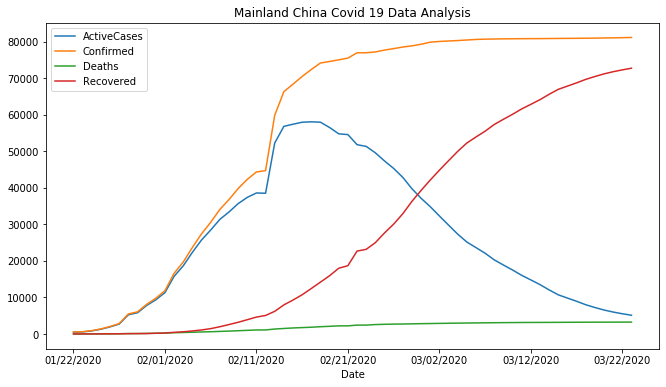

In [87]:
casesInEachCountry('Mainland China')

Text(0.5, 1.0, 'Italy Covid 19 Data Analysis')

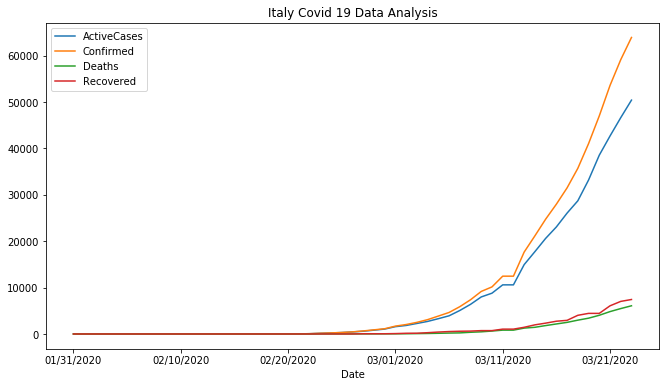

In [88]:
 casesInEachCountry('Italy')

Text(0.5, 1.0, 'Sri Lanka Covid 19 Data Analysis')

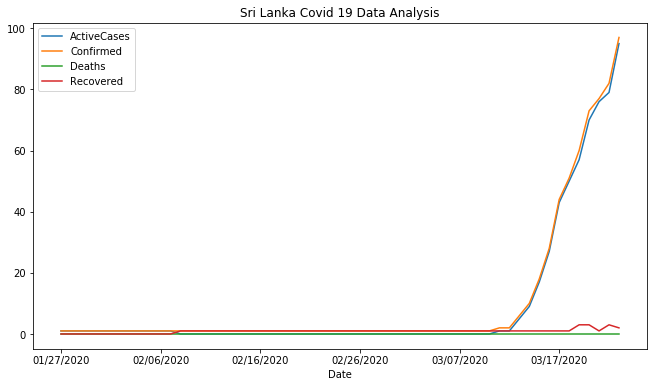

In [89]:
 casesInEachCountry('Sri Lanka')

Text(0.5, 1.0, 'Iran Covid 19 Data Analysis')

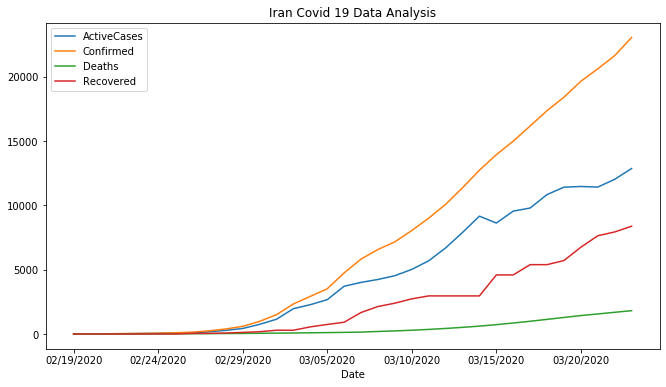

In [90]:
casesInEachCountry('Iran')

Text(0.5, 1.0, 'Top 20 Effected Countries')

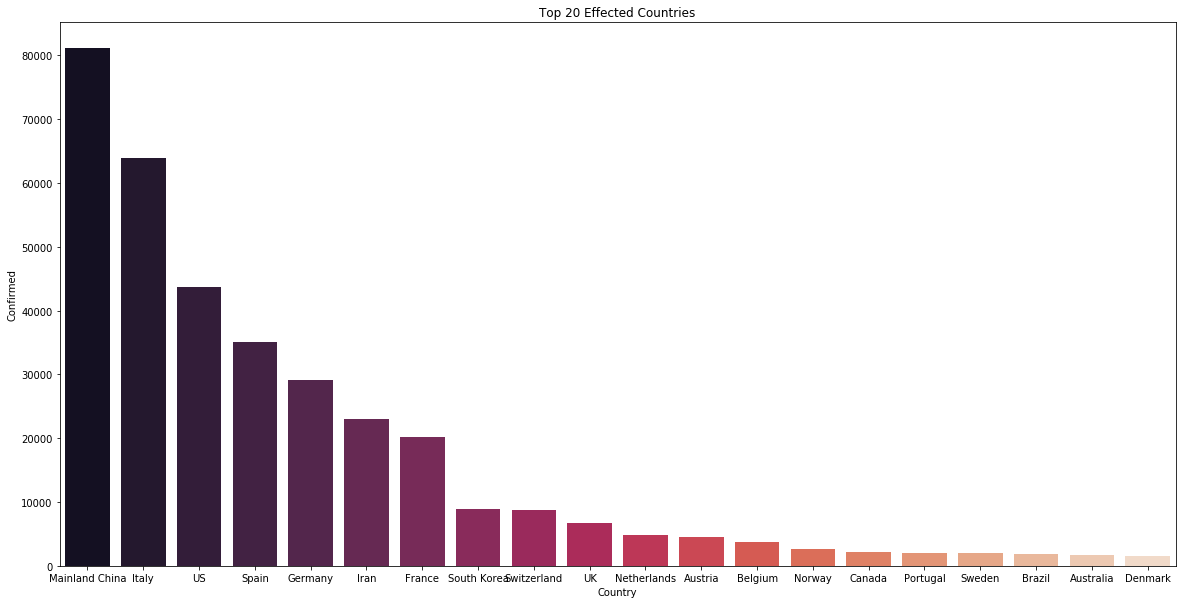

In [91]:
# Effected Countries- Sorted by Number of Cases (TOP 20)
sorted_By_NumberofCases=Confirmed_patients.head(20)
x=sorted_By_NumberofCases.Country
y=sorted_By_NumberofCases.Confirmed
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x,y,order=x ,palette="rocket").set_title('Top 20 Effected Countries')

In [92]:
cases_per_Day = data.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
data_table=cases_per_Day.sort_values('Date',ascending=False)

data_table.style.background_gradient(cmap='Blues')
# data_table.set_title('Increasing of the Virus')


C:\Users\User\Anaconda3\envs\yasas_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed,Deaths,Recovered
61,03/23/2020,378287.000000,16497.000000,100958.000000
60,03/22/2020,335957.000000,14634.000000,97882.000000
59,03/21/2020,304528.000000,12973.000000,91676.000000
58,03/20/2020,272167.000000,11299.000000,87403.000000
57,03/19/2020,242713.000000,9867.000000,84962.000000
56,03/18/2020,214915.000000,8733.000000,83313.000000
55,03/17/2020,197168.000000,7905.000000,80840.000000
54,03/16/2020,181546.000000,7126.000000,78088.000000
53,03/15/2020,167447.000000,6440.000000,76034.000000
52,03/14/2020,156099.000000,5819.000000,72624.000000


Blue : Confirmed Cases 
Red : Deaths Cases 
Green : Recovered Cases 


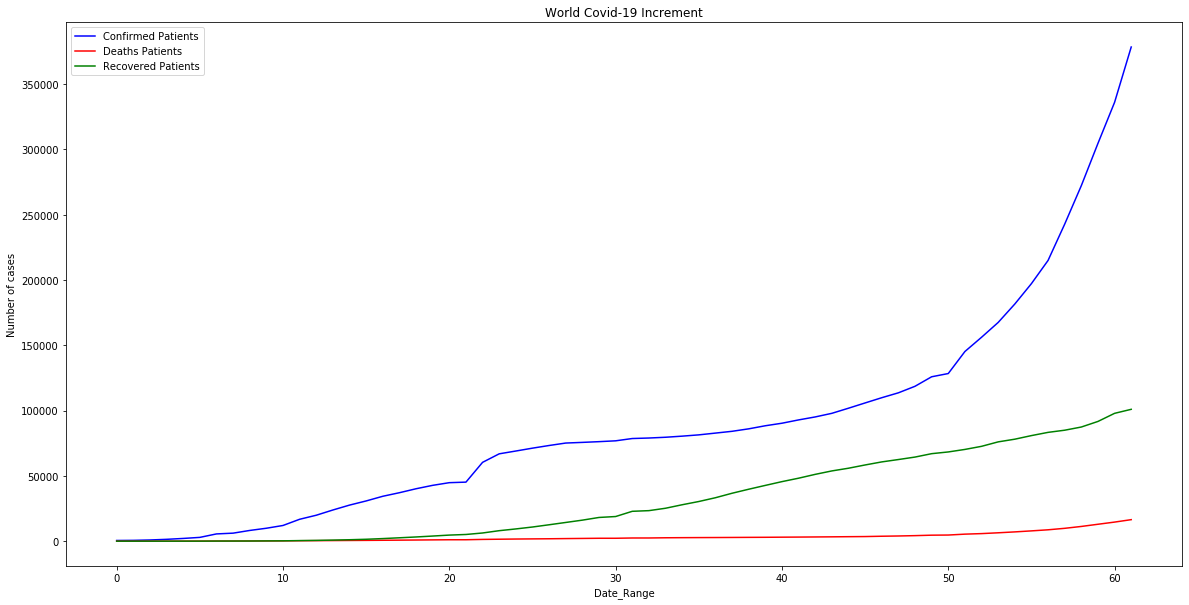

In [93]:
x=cases_per_Day.index

y=cases_per_Day.Confirmed
y1=cases_per_Day.Deaths
y2=cases_per_Day.Recovered

plt.plot(x,y,color='blue',label='Confirmed Patients')
plt.plot(x,y1,color='red' ,label="Deaths Patients")
plt.plot(x,y2,color='green',label="Recovered Patients")
print("Blue : Confirmed Cases ")
print("Red : Deaths Cases ")
print("Green : Recovered Cases ")
plt.xlabel("Date_Range")
plt.ylabel("Number of cases")
plt.title("World Covid-19 Increment")
plt.legend()
plt.show()

In [94]:
x_data=pd.DataFrame(cases_per_Day.index)
y_data=pd.DataFrame(cases_per_Day.Confirmed)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

In [95]:
poly_reg=PolynomialFeatures(degree=7)
x_poly=poly_reg.fit_transform(x_train)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

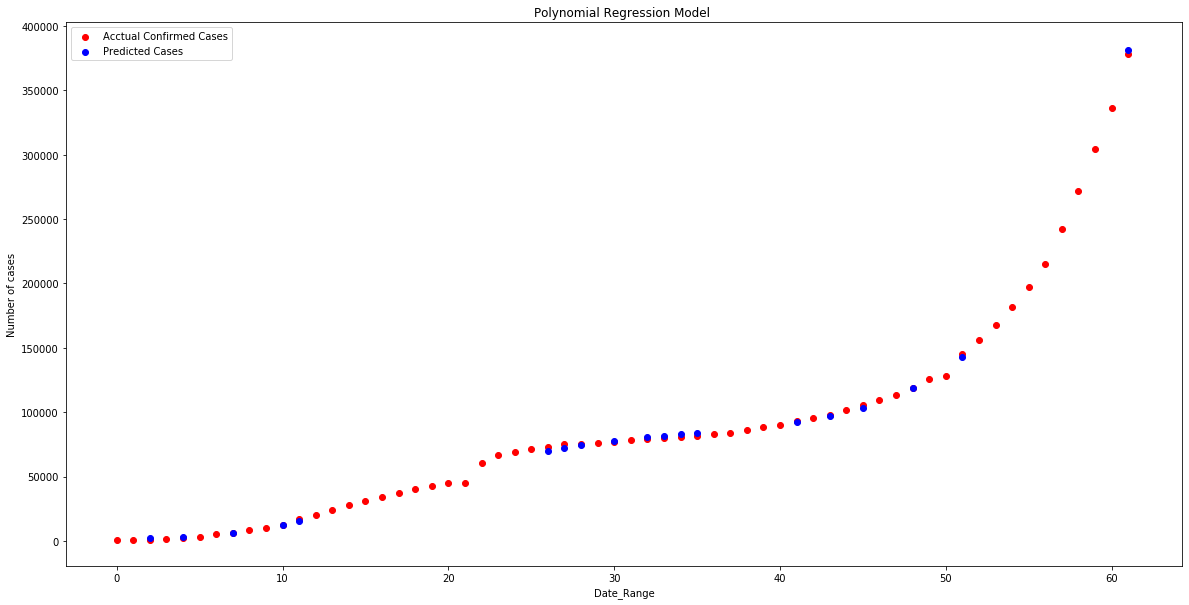

In [96]:
plt.scatter(x,y,color='red',label='Acctual Confirmed Cases')
plt.scatter(x_test,lin_reg2.predict(poly_reg.fit_transform(x_test)),color='blue',label='Predicted Cases')
plt.title("Polynomial Regression Model ")
plt.xlabel("Date_Range")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

In [97]:
# Accuracy of the Polynomial regression Model Accuracy
y_pred=lin_reg2.predict(poly_reg.fit_transform(x_test))
print('Accuracy of the Polynomial Regession Model  : ',r2_score(y_test, y_pred))

Accuracy of the Polynomial Regession Model  :  0.9994018680034337


In [98]:
# Display Graph Function
def displayGraph(X_test,y_test,y_pred):
    plt.scatter(X_test,y_test,color="blue",label="Acctual Cases")
    plt.scatter(X_test,y_pred, color='red',label="Predicted Cases")
    plt.xlabel("Date_Range")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.show()

LinearRegression: 0.687558 (28607.550585)


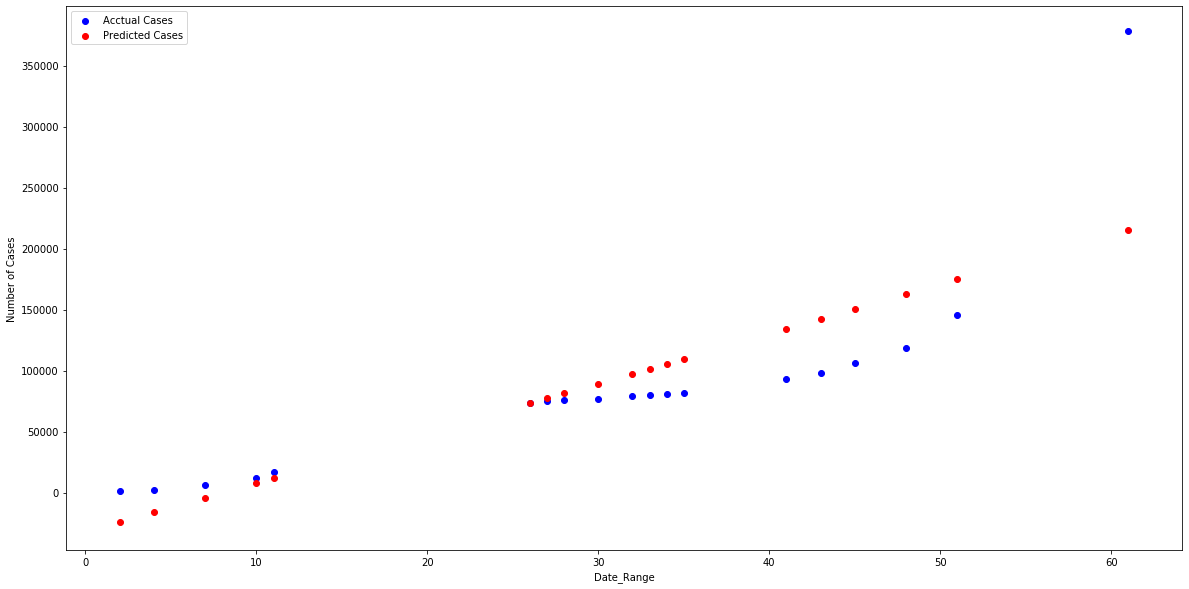

C:\Users\User\Anaconda3\envs\yasas_env\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BaggingRegressor: 0.978587 (4406.757895)


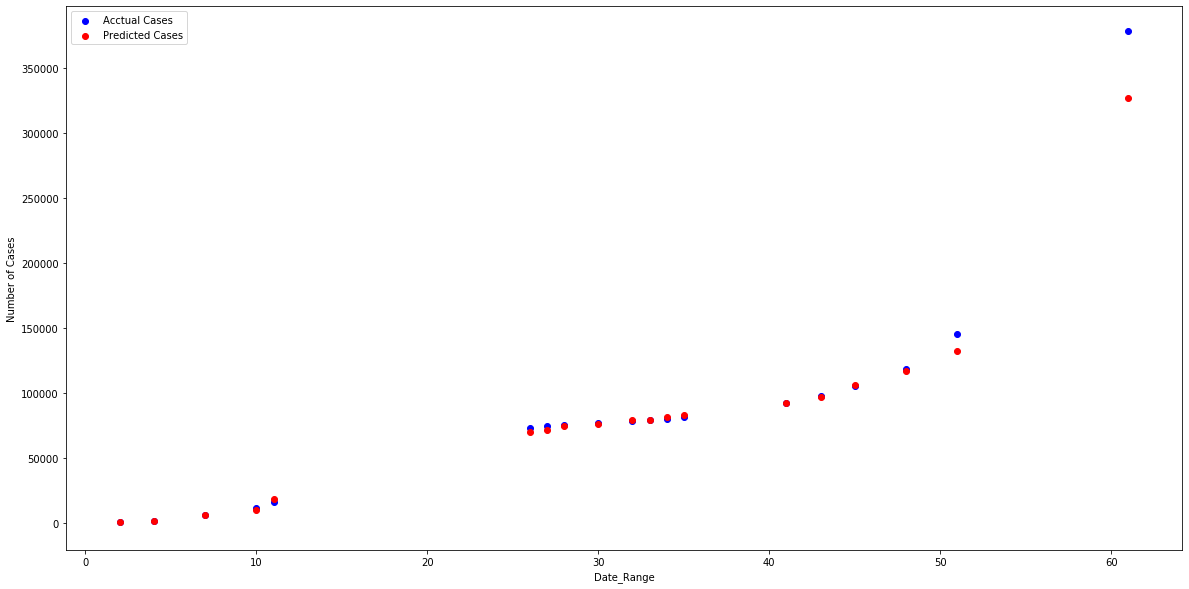

C:\Users\User\Anaconda3\envs\yasas_env\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForest: 0.973704 (4460.612632)


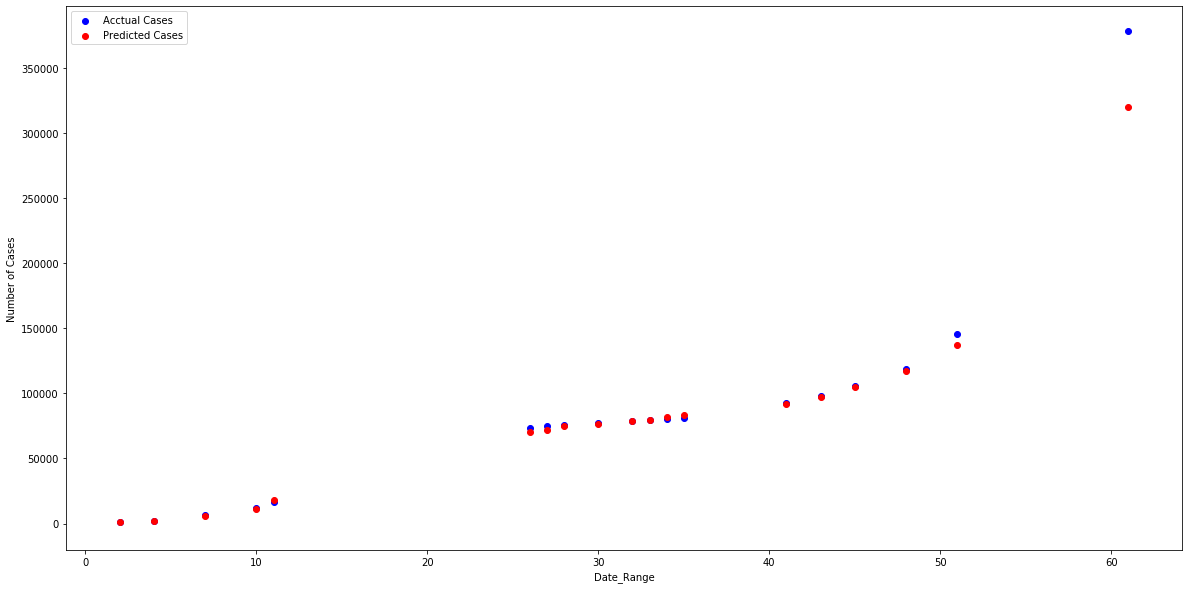

KNeighbours: 0.912013 (8120.473684)


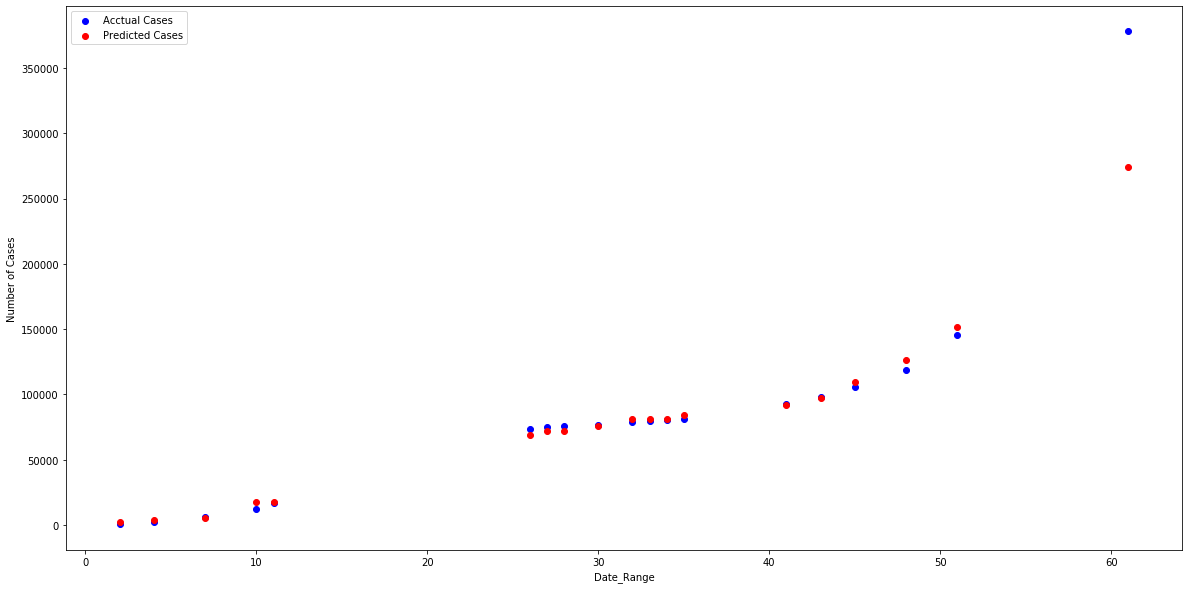

In [99]:
# Check Some Algorithms For Prediction
algorithms = []
algorithms.append(('LinearRegression', LinearRegression()))  #Linear Regression
algorithms.append(('BaggingRegressor', BaggingRegressor()))  #Bagging REgressor
algorithms.append(('RandomForest', RandomForestRegressor())) #Random Forest Tree
algorithms.append(('KNeighbours', KNeighborsRegressor()))    #K Neighbours 


# Evaluations
results = []
names = []


for name,model in algorithms:
    
#     Fit data to the model
    model.fit(x_train,y_train)
    
#     Predict data
    predictions = model.predict(x_test)
    
#     Get Varice
    variance = explained_variance_score(y_test, predictions)
#     Get mean absolute error
    meanError = mean_absolute_error(predictions,y_test)
    results.append(meanError)
    names.append(name) 
#     Display result
    result = "%s: %f (%f)" % (name,variance, meanError)
    print(result)
    
    displayGraph(x_test,y_test,predictions)
#     model.save(name.h5)